## Ex. 2-1)  Padding

Sometimes, your algorithm requires fixed-size input, and you might want to pad pixel values to compensate the size difference for your input. There are multiple ways to do this.
<img src="fig/pad.png" style="width:600px">
(image copyright: https://github.com/pjreddie/uwimg/tree/main/src/hw0)

Try to implement adding 20 pixels around the image with clamp padding.

### Type your code below.

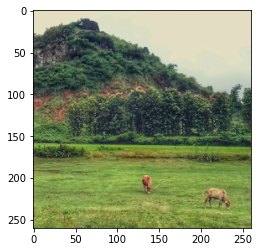

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/nature.png"
img = Image.open(in_img_path)
pix = np.asarray(img)
plt.imshow(pix)

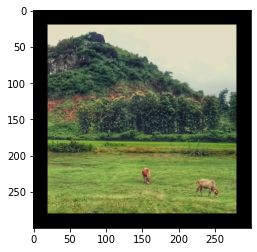

In [21]:
padw = 20
[h, w, c] = pix.shape
new_shape = [h+2*padw, w+2*padw, c]
newpix = np.zeros(new_shape, dtype=np.uint8)
newpix[padw:padw+h, padw:padw+w] = pix

plt.imshow(newpix)
plt.show()

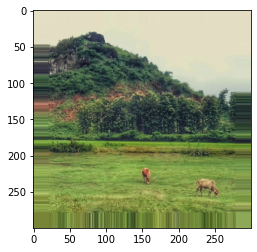

In [22]:
for i in range(padw, padw+h):
    newpix[i, 0:padw] = newpix[i, padw]
    newpix[i, padw+w: w+2*padw] = newpix[i, w+padw-1]
    
for i in range(padw):
    newpix[i] = newpix[padw]
    newpix[-i-1] = newpix[-padw-1]
    
plt.imshow(newpix)
plt.show()

Example code:

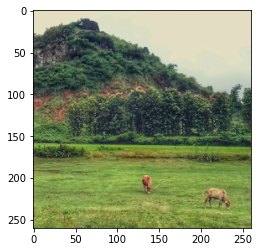

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/nature.png"
img = Image.open(in_img_path)
imgplot = plt.imshow(img)
pix = np.asarray(img)

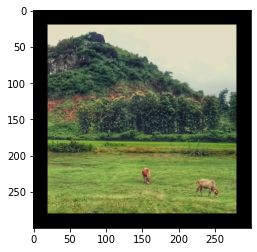

In [7]:
pw = 20
[h,w,c] = pix.shape
new_shape = [h+pw*2, w+pw*2, c]

padded = np.zeros(new_shape,dtype=np.uint8)
padded[pw:pw+pix.shape[0], pw:pw+pix.shape[1]] = pix

imgplot = plt.imshow(padded)

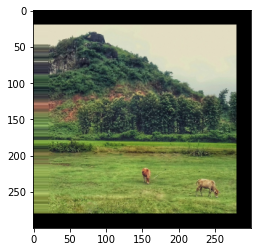

In [8]:
# Left side
for i in range(0,pw):
    padded[pw:pw+pix.shape[0],i] = pix[0:pix.shape[0],0]
    
imgplot = plt.imshow(padded)

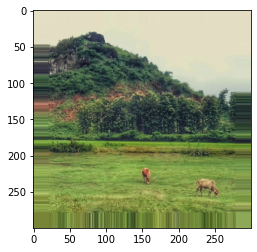

In [9]:
# Right side
for i in range(pw+pix.shape[1],pw*2+pix.shape[1]):
    padded[pw:pw+pix.shape[0],i] = pix[0:pix.shape[0],pix.shape[1]-1]

# Top part
for i in range(0,pw):
    padded[i,0:pw*2+pix.shape[1]] = padded[pw,0:pw*2+pix.shape[1]]
    
# Bottom part
for i in range(pw+pix.shape[0],pw*2+pix.shape[0]):
    padded[i,0:pw*2+pix.shape[1]] = padded[pw+pix.shape[0]-1,0:pw*2+pix.shape[1]]
    
res = Image.fromarray(np.uint8(padded))
res.save("padded.png") 
imgplot = plt.imshow(res)